# Iniciando o programa
Iremos apenas importar as bibliotecas necessários e iniciar o pyplot
Adianto que foi tentado usar pygame, mas o Jupyer não suporta GUIs

In [20]:
from matplotlib import pyplot as plt
import time

def plotarPontos(pontos, title):
    plt.axis([0, 20, 0, 20])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    x = []
    y = []
    for ponto in pontos:
        x.append(ponto[0])
        y.append(ponto[1])
    plt.plot(x, y, 'ro')

    plt.title(title)
    plt.show()

# Plotando com DDA
Vamos fazer uma reta simples com o algoritmo DDA

Pontos DDA: [(0, 6), (1, 7), (1, 8), (2, 9), (2, 10), (3, 11), (3, 12), (4, 13), (4, 14), (5, 15), (5, 16), (6, 17)]


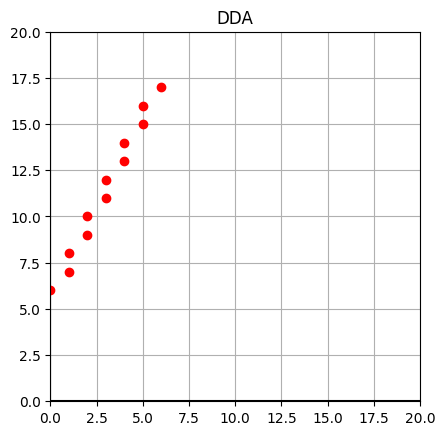

In [21]:
def DDA(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1

    step = 0
    if abs(dx) > abs(dy):
        step = abs(dx)
    else:
        step = abs(dy)

    x_inc = dx / step
    y_inc = dy / step

    x = x1
    y = y1

    points = []

    while x != x2 and y != y2:
        points.append((round(x), round(y)))
        x += x_inc
        y += y_inc

    points.append((x2, y2))
    return points

points = DDA(0, 6, 6, 17)
print("Pontos DDA: {}".format(points))

plotarPontos(points, "DDA")

# Plotando com Bresenham de Retas
Como o algoritmo de Bresenham foi adaptado para funcionar com vários tipos de retas, vamos mostrar alguns exemplos

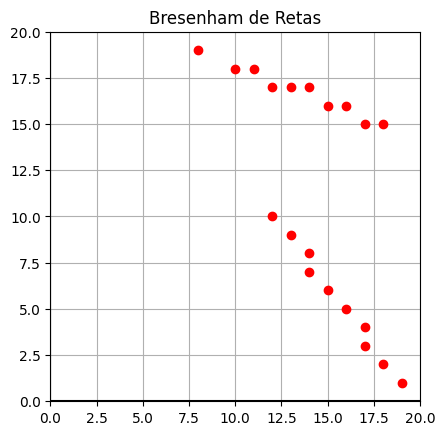

In [22]:
def bresenham_lines(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    p = 2 * dy - dx
    _2dy = 2 * dy
    _2dy_2dx = 2 * (dy - dx)

    points = []
    if dy > dx:
        points = bresenham_lines(y1, x1, y2, x2)
        for i in range(len(points)):
            points[i] = (points[i][1], points[i][0])
        return points

    x = x1
    y = y1

    while x != x2 and y != y2:
        points.append((x, y))

        x += sx
        if p < 0:
            p += _2dy
        else:
            y += sy
            p += _2dy_2dx

    points.append((x2, y2))
    return points

points1 = bresenham_lines(12, 10, 19, 1)
points2 = bresenham_lines(18, 15, 8, 19)
all_points = points1 + points2
plotarPontos(all_points, "Bresenham de Retas")

# Plotando com Bresenham de Circunferências
Agora vamos plotar uma circunferência com o algoritmo de Bresenham

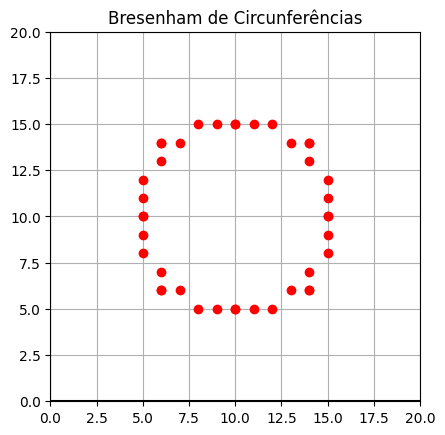

In [23]:
def bresenham_circle(xc, yc, r):
    p = 1 - r
    x = 0
    y = r

    points = []
    while x <= y:
        points.append((xc + x, yc + y))
        points.append((xc + x, yc - y))
        points.append((xc - x, yc + y))
        points.append((xc - x, yc - y))
        points.append((xc + y, yc + x))
        points.append((xc + y, yc - x))
        points.append((xc - y, yc + x))
        points.append((xc - y, yc - x))

        if p < 0:
            p += 2 * x + 1
        else:
            p += 2 * (x - y) + 1
            y -= 1
        x += 1

    return points

points = bresenham_circle(10, 10, 5)
plotarPontos(points, "Bresenham de Circunferências")